Dataset Shape: (50765, 20)
   Dist Code  Year  State Code    State Name Dist Name      Crop   Area_ha  \
0          1  1966          14  Chhattisgarh      Durg      rice  548000.0   
1          1  1966          14  Chhattisgarh      Durg     maize    3000.0   
2          1  1966          14  Chhattisgarh      Durg  chickpea   54000.0   
3          1  1967          14  Chhattisgarh      Durg      rice  547000.0   
4          1  1967          14  Chhattisgarh      Durg     maize    3000.0   

   Yield_kg_per_ha  N_req_kg_per_ha  P_req_kg_per_ha  K_req_kg_per_ha  \
0           337.59          8.43975          4.05108          7.42698   
1           666.67         18.00009          8.00004         11.33339   
2           500.00          9.00000          5.00000          9.00000   
3           747.71         18.69275          8.97252         16.44962   
4          1000.00         27.00000         12.00000         17.00000   

    Total_N_kg  Total_P_kg  Total_K_kg  Temperature_C  Humidity_%

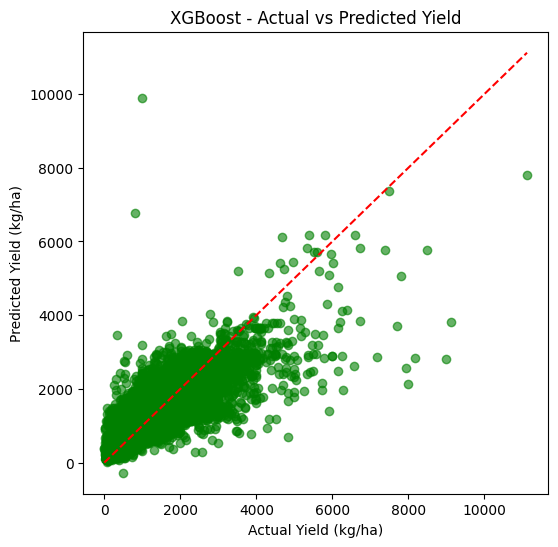

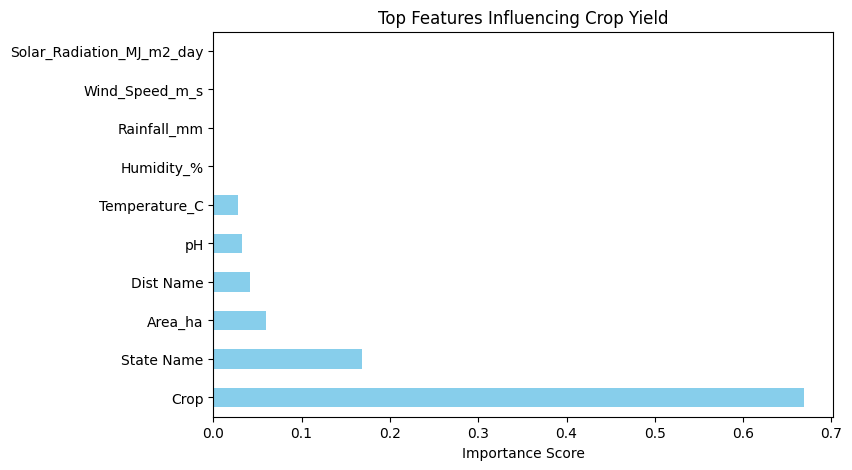

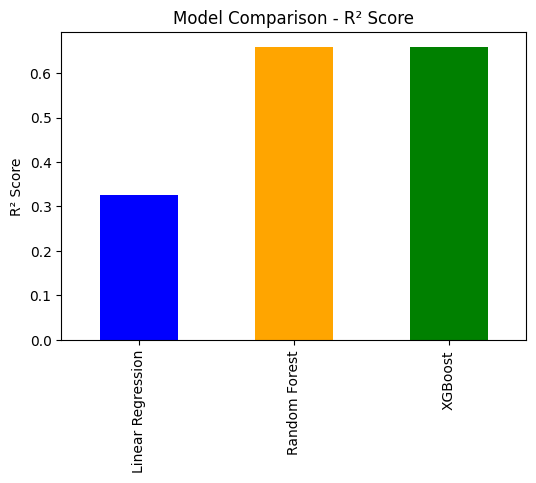


✅ Model and Scaler Saved Successfully!


In [ ]:
# ===============================
# train_model.py
# ===============================

import pandas as pd
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# ===============================
# 1. Load Dataset
# ===============================
df = pd.read_csv("Custom_Crops_yield_Historical_Dataset.csv")
print("Dataset Shape:", df.shape)

# ===============================
# 2. Preprocessing
# ===============================
drop_cols = [
    'Dist Code', 'State Code',
    'Total_N_kg', 'Total_P_kg', 'Total_K_kg',
    'N_req_kg_per_ha', 'P_req_kg_per_ha', 'K_req_kg_per_ha',
    'Year'
]
df = df.drop(columns=drop_cols, errors='ignore')

# Encode categorical variables
label_cols = ['State Name', 'Dist Name', 'Crop']
encoders = {}
for col in label_cols:
    enc = LabelEncoder()
    df[col] = enc.fit_transform(df[col])
    encoders[col] = enc

# Handle missing values
df = df.fillna(df.median(numeric_only=True))

# ===============================
# 3. Features & Target
# ===============================
X = df.drop(columns=['Yield_kg_per_ha'])
y = df['Yield_kg_per_ha']

# Save feature names
feature_names = list(X.columns)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# ===============================
# 4. Train Model (XGBoost)
# ===============================
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
print("\n✅ Training Done!")
print("R²:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

# ===============================
# 5. Save Model + Scaler + Features
# ===============================
joblib.dump(xgb, "crop_yield_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(feature_names, "feature_names.pkl")
joblib.dump(encoders, "encoders.pkl")

print("\n✅ Model, Scaler, Feature Names, and Encoders Saved Successfully!")
